**Image classification**

Data collection

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-07-11 06:10:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   167MB/s    in 0.4s    

2020-07-11 06:10:26 (167 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Main Folder
* Train--cats and dogs
* validation --cats and dogs

In [3]:
import os
import zipfile
local_zip="/content/drive/My Drive/Summer Internship/cats_and_dogs_filtered.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [5]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['cats', 'dogs']

In [6]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))

1000
1000


In [7]:
base_dir="/tmp/cats_and_dogs_filtered"
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
train_cat_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cat_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [8]:
train_cat_filenames=os.listdir(train_cat_dir)
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

In [9]:
os.listdir()

['.config', 'drive', 'sample_data']

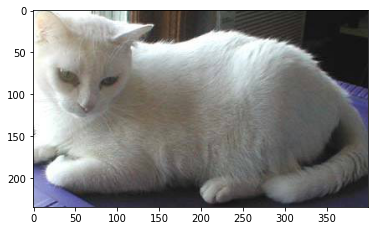

In [10]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

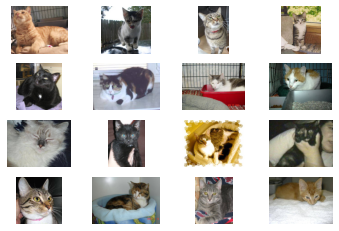

In [11]:
import matplotlib.pyplot as plt
j=1
for i in range(16):
  img=plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')
  j+=1

Read the image data

We have different shapes here.

We need same shape for each and every image

reshaing the images

cats and dogs labelling

**Creating Train and valiadtion data from Folder**

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
train_generator

(20, 150, 150, 3)
(20,)


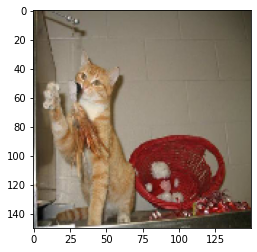

In [14]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

In [15]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [16]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
model = Sequential()

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(16, 3, activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
model.add(Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(Dense(512, activation='relu'))

# Create output layer with a single node and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

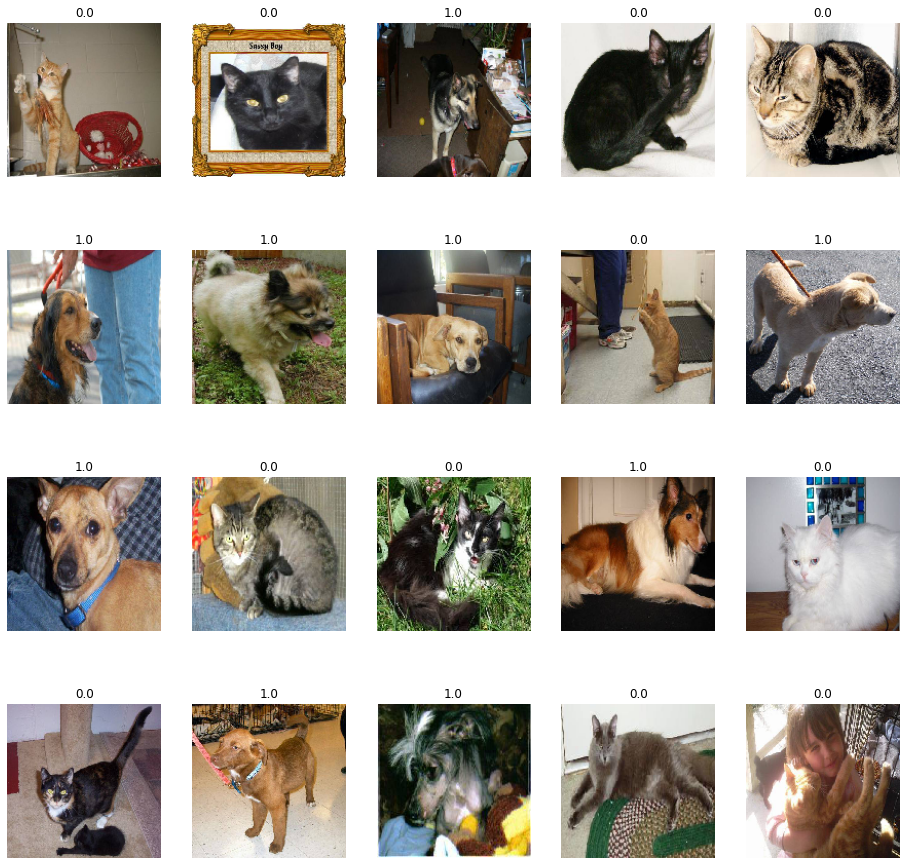

In [17]:
plt.figure(figsize=(16,16))
pos=1
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])
  plt.title(labels[i])
  plt.axis('off')
  pos+=1

In [18]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Conv2D,Dense,Flatten,MaxPooling2D

In [19]:
model=Sequential()
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))

model=Sequential()
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))

model=Sequential()
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               44859904  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 44,860,865
Trainable params: 44,860,865
Non-trainable params: 0
_________________________________________________________________


In [20]:
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [21]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 11s 112ms/step - loss: 2.4971 - accuracy: 0.5430 - val_loss: 0.6417 - val_accuracy: 0.6200
Epoch 2/15
100/100 [==============================] - 11s 112ms/step - loss: 0.5390 - accuracy: 0.7485 - val_loss: 0.6222 - val_accuracy: 0.6460
Epoch 3/15
100/100 [==============================] - 11s 108ms/step - loss: 0.3224 - accuracy: 0.8850 - val_loss: 0.6418 - val_accuracy: 0.6820
Epoch 4/15
100/100 [==============================] - 11s 109ms/step - loss: 0.1332 - accuracy: 0.9650 - val_loss: 0.8597 - val_accuracy: 0.6680
Epoch 5/15
100/100 [==============================] - 11s 108ms/step - loss: 0.0732 - accuracy: 0.9825 - val_loss: 1.1647 - val_accuracy: 0.6590
Epoch 6/15
100/100 [==============================] - 11s 109ms/step - loss: 0.0763 - accuracy: 0.9865 - val_loss: 1.0193 - val_accuracy: 0.6590
Epoch 7/15
100/100 [==============================] - 11s 108ms/step - loss: 0.0303 - accuracy: 0.9930 - val_loss: 1.2731 - val_ac

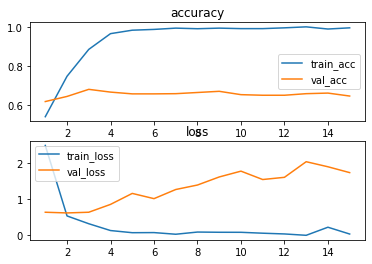

In [22]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

In [23]:
from tensorflow.keras.preprocessing import  image
import numpy as np
img=image.load_img('/content/drive/My Drive/Summer Internship/dog.PNG')
print(type(img))

img=tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img=tf.image.resize(img,(150,150))

img=img/255
print(img.shape)
img=np.expand_dims(img,axis=0)
print(img.shape)

<class 'PIL.Image.Image'>
(444, 632, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [24]:
model.predict(img)

array([[0.39426553]], dtype=float32)